<a href="https://colab.research.google.com/github/wonmyeong/olive-young/blob/master/BernoulliNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tweepy==3.10

In [ ]:
try:
    import konlpy
except:
    !pip install -q konlpy
    import konlpy

import pandas as pd
import numpy as np

konlpy.__version__

'0.6.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data_df = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//concat_review_df")

In [ ]:
data_df.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
data_df

review  label
0                 Ïú†ÌÜµÍ∏∞ÌïúÎèÑ ÎÑâÎÑâÌïòÍ≥†      1
1         Íµ¨ÏÑ±ÎèÑ ÎßéÏïÑÏÑú ÏÑ†Î¨º ÌïòÍ∏∞ Ï¢ãÎÑ§Ïöî.      1
2                     Íµ¨ÏÑ±ÎèÑÏïåÏ∞®Í≥†      1
3                  Ï¥âÏ¥âÌïòÍ≥†ÎÑàÎ¨¥Ï¢ãÏïÑÏö©      1
4        ÎåÄÏö©ÎüâÏúºÎ°ú ÎÑâÎÑâÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≥†      1
...                      ...    ...
2995                Íµ¨ÏÑ±ÎèÑ ÏïÑÏâΩÏßÄÎßå      0
2996          Ïò§Îû´ÎèôÏïà Ï¥âÏ¥âÌïòÏßÄ ÏïäÏïÑÏöî.      0
2997               Ï¥âÏ¥âÌïòÏßÄ ÏïäÏïÑÏöî.      0
2998  Î™© Ï£ºÎ¶Ñ Í∞úÏÑ† Ìö®Í≥ºÎèÑ ÏóÜÎäî Í≤É Í∞ôÏäµÎãàÎã§.      0
2999                    ÎπÑÏã∏ÎèÑ       0

[3000 rows x 2 columns]

In [ ]:
## okt ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÌôúÏö©Ìïú Î∂àÏö©Ïñ¥ Ï†úÍ±∞
from konlpy.tag import Okt
okt = Okt()
def clean_text(text):
      tokens = okt.pos(text)
      # Ï°∞ÏÇ¨, Íµ¨ÎëêÏ†ê, ÏïåÌååÎ≤≥ÏùÑ Ï†úÏô∏
      tokens = [(word, pos) for word, pos in tokens if pos not in ['Josa', 'Punctuation', 'Alpha']]
      # Extract only the words from the first element of each tuple
      words = [word for word, _ in tokens]

      # Join the words together to form a sentence
      cleaned_text = ' '.join(words)  # Í≥µÎ∞± ÏóÜÏù¥ ÌïúÍ∏Ä Îã®Ïñ¥Îì§ÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§.

      return cleaned_text


data_df['review'] = data_df['review'].apply(lambda x: clean_text(x))

text_test = data_df['review'].values
y_test = data_df['label'].values

In [ ]:
from konlpy.tag import Okt

class PicklableOkt(Okt):
    def __init__(self, *args):
        self.args = args
        Okt.__init__(self, *args)

    def __getstate__(self):
        return {'args': self.args}

    def __setstate__(self, state):
        self.__init__(*state['args'])


In [ ]:
#### ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•ò ÏãúÏûë

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
model = BernoulliNB()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV #ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ Í∞íÏùÑ Ï∞æÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

# ÏßÅÎ†¨Ìôî Í∞ÄÎä•Ìïú PickableOkt ÏÇ¨Ïö©ÌïòÏó¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ±
param_grid = {
    'tfidfvectorizer__min_df': [3],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'bernoullinb__alpha': [0.1, 1, 10]
}

pipe = make_pipeline(TfidfVectorizer(tokenizer=PicklableOkt().morphs), BernoulliNB())
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(tokenizer=<bound method Okt.morphs of <__main__.PicklableOkt object at 0x7caffc099090>>)),
                                       ('bernoullinb', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'bernoullinb__alpha': [0.1, 1, 10],
                         'tfidfvectorizer__min_df': [3],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [ ]:
print("ÏµúÏ†ÅÏùò ÍµêÏ∞® Í≤ÄÏ¶ù Ï†êÏàò : {:.2f}".format(grid.best_score_))
print("ÏµúÏ†ÅÏùò Îß§Í∞úÎ≥ÄÏàò : \n",grid.best_params_)

ÏµúÏ†ÅÏùò ÍµêÏ∞® Í≤ÄÏ¶ù Ï†êÏàò : 0.83
ÏµúÏ†ÅÏùò Îß§Í∞úÎ≥ÄÏàò : 
 {'bernoullinb__alpha': 0.1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 2)}


#BernoulliNB Î™®Îç∏ Ï†êÏàò ÏãúÍ∞ÅÌôî

In [ ]:
!pip install mglearn

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

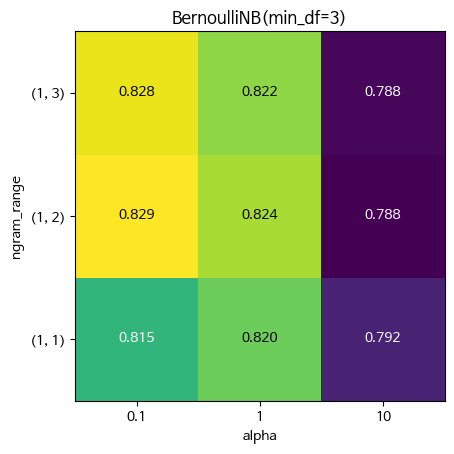

In [ ]:
#Îß§Í∞úÎ≥ÄÏàò ÌûàÌä∏Îßµ
import mglearn

scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T
heatmap = mglearn.tools.heatmap(
    scores,xlabel="alpha",ylabel="ngram_range", cmap="viridis",fmt="%.3f",
    xticklabels = param_grid["bernoullinb__alpha"],
    yticklabels = param_grid["tfidfvectorizer__ngram_range"]

)

plt.title("BernoulliNB(min_df=3)")
plt.show()

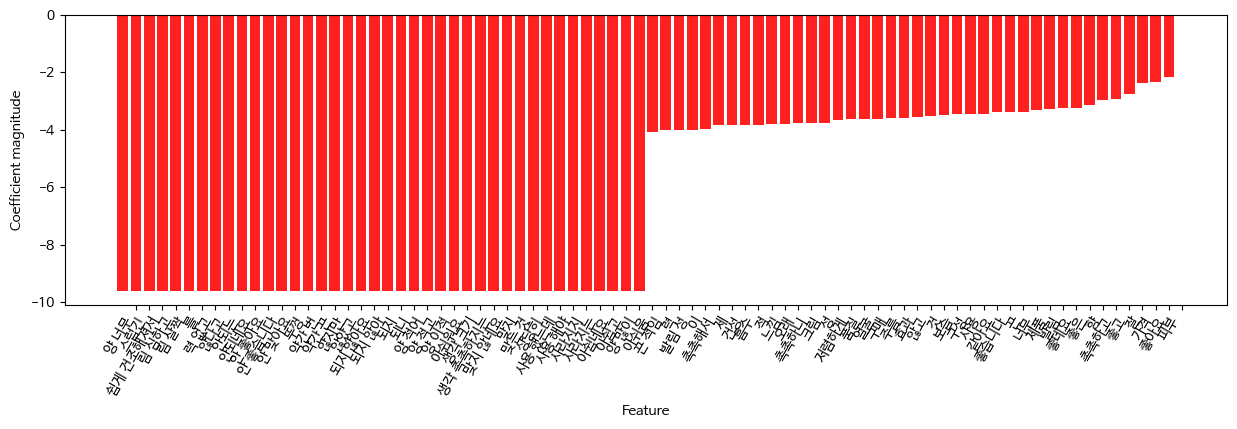

In [ ]:
# BernoulliNB Î™®Îç∏ ÏÇ¨Ïö© Ïãú
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['bernoullinb'].feature_log_prob_
mglearn.tools.visualize_coefficients(coef[1], feature_names, n_top_features=40)


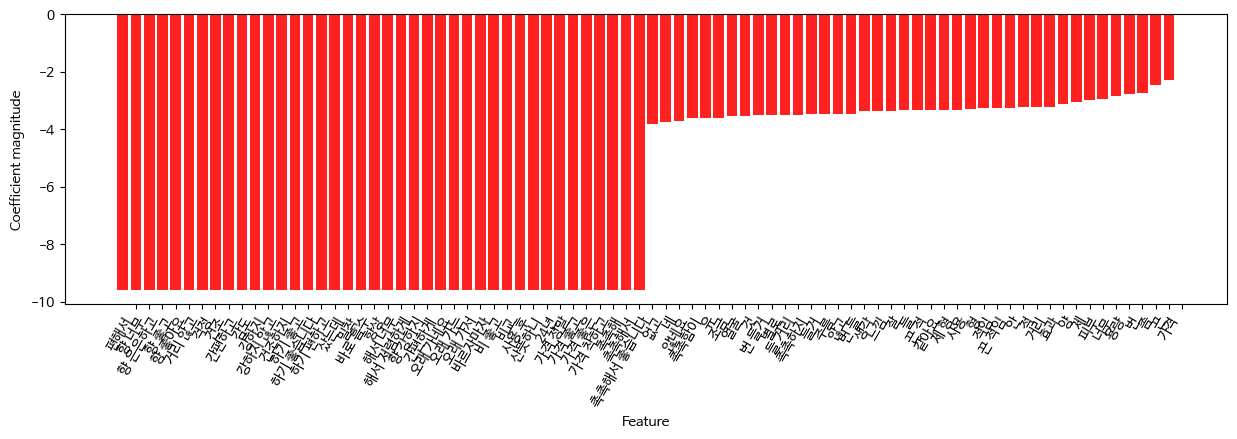

In [ ]:
# BernoulliNB Î™®Îç∏ ÏÇ¨Ïö© Ïãú
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['bernoullinb'].feature_log_prob_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

In [ ]:
final_olive_review = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//final_olive_review_data_df")
final_olive_review.drop(columns={"Unnamed: 0"},inplace=True)

In [ ]:
## ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ï†ú
missing_values = final_olive_review['reviews'].isna().sum()

# If there are missing values, drop the corresponding rows
if missing_values > 0:
    final_olive_review.dropna(subset=['reviews'], inplace=True)

In [ ]:
x_test = final_olive_review['reviews']
y_test = final_olive_review['rating']

In [ ]:
# Create an empty list to store predicted classes
predicted_classes = []

# Iterate over each review in the DataFrame column
for review in final_olive_review['reviews']:
    # Make prediction using the best estimator found by GridSearchCV
    predicted_class = grid.predict([review])

    # Append the predicted class to the list
    predicted_classes.append(predicted_class[0])  # Access the predicted class (it's a numpy array) and append

# Add the predicted classes as a new column named 'prediction' to the DataFrame
final_olive_review['prediction'] = predicted_classes



In [ ]:
final_olive_review

userId  rating                                            reviews  \
0              ÏôÄÎ∞îÎ∞§       1  ÏÇ¨Ïã§ ÎßàÏä§ÌÅ¨ Ìå© Ìïú Îã¨Îèô Ïïà ÏÇ¨Ïö© Í≤É ÏïÑÎãàÎùº Ìïú Îã¨ Î¶¨Î∑∞ ÌïòÍ∏∞ Ïñò Îß§Ìïò Í∏¥ÌïúÎç∞ Ïñ¥Ï©É...   
1              ÏôÄÎ∞îÎ∞§       1              Î∞∞ÏÜ°ÎπÑ Í∞ÄÍ≤© ÎßûÏ∂ú Îïå Ïú†Ïö©ÌïòÍ≤å Îß§Î≤à Íµ¨Îß§ ÏûàÏäµÎãàÎã§ ÏûêÍ∑π ÏóÜÏù¥ ÏàúÌï¥Ïó¨   
2            Î≥¥Î∂ÄÏÉÅÏ∂úÏã†       1  ÎÇòÏù¥ Î®πÏúºÎãàÍπå ÌîºÎ∂Ä Í≥†ÎØº Ï†êÏ∞® Ï£ºÎ¶Ñ ÎØ∏Î∞± Ï™Ω Îπ†ÏßÄÎäîÎç∞Îç∞ ÏùºÎ¶¨ ÌîºÎ∂Ä Í≤∞ ÌÜ§ ÏºÄÏñ¥ ÌïòÍ∏∞...   
3             ÌååÏù¥ÏßÄÎãà       1  üåº 1Ïùº 1 Ìå© ÌïòÍ∏∞ Ï¢ãÏùÄ Í∞ÄÏÑ± ÎπÑ ÎßàÏä§ÌÅ¨ Ìå© üåº Î©îÎîî Ìûê ÎßàÏä§ÌÅ¨ Ìå© ÎÑàÎ¨¥ Ïú†Î™ÖÌïòÏ£†...   
4            Î≥¥Î∂ÄÏÉÅÏ∂úÏã†       1  ÏöîÏ¶ò Ï†ú ÌîºÎ∂Ä ÏÉÅÌÉú ÌÉÑÎ†• ÏßÄÍ∏à Ï†Ä ÏÑ∏ÏÉÅ Í∞ÄÏûàÎäîÎç∞ Î≥µÍµ¨ ÏúÑÌï¥ ÏΩúÎùºÍ≤ê ÎßàÏä§ÌÅ¨ Ìå© Ïù¥Ïö© ...   
..             ...     ...                                                ...   
595       nam****        0  ÏóêÏÑºÏä§ ÌîºÎ∂Ä Ïò§ÌûàÎû¥ Í±¥Ï°∞ÌïòÍ≤å ÌïòÎäî ÎäêÎÇå Ïù¥ÏòÄÏñ¥Ïö© „Ö†„Ö† ÏùºÏãú Ï†Å Î≥¥Ïäµ Î†• ÏûàÍ≥† Í∑∏ Ïù¥...   
596     dltnw****        0  Ìï≠ÏÉÅ Ï¶êÍ≤® Ïì∞Îäî Ìå© ÏûÖÎãàÎã§ÏïÑ ÏñºÍµ¥ ÌÅ¨Í∏∞ Ï†ÅÎãπÌïòÍ≤å Ïûò ÎßûÍ≥† ÎßéÏù¥ ÏòàÎØºÌï¥ÏÑú ÏïÑÎ¨¥ Í±∞ÎÇò ...   
597       puk****        0  Î¨∏ Ïïû ÎÜî Îã¨Îùº ÌñàÎäîÎç∞ Í≤ΩÎπÑÏã§ ÎÜìÍ≥†Í∞ÄÏÑú ÏóÜÏñ¥ÏßÑÏ§Ñ Ïïå ÎãπÌô© ÌñàÏñ¥ Ïö™ ÌÉùÎ∞∞ Í∏∞ÏÇ¨ Îãò Ïù¥...   
598   sojung2****        0  10 Í∞ú Ïù¥ÏÉÅ Íµ¨Îß§ ÌïòÎ©¥ Î∞ïÏä§ Ïò§ÎäîÏ§Ñ ÏïåÏïòÎäîÎç∞ ÎÇ±Í∞ú ÏôÄÏÑú ÏïÑÏâ¨ÏõåÏöî Ìå© ÏõêÎûò Ïù¥Î†áÍ≤å ...   
599       pga****        0                   Îî±Ìûà ÏßÑÏ†ï Ìö®Í≥º ÏûàÎäîÏßÄ Î™®Î•¥Í≤†Í≥† Î≥¥Ïäµ Ìö®Í≥º Ïûò Î™®Î•¥Í≤†ÏäµÎãàÎã§   

     prediction  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
595           0  
596           1  
597           1  
598           0  
599           1  

[599 rows x 4 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,final_olive_review['prediction'])

In [ ]:
print("Î™®Îç∏ Î∂ÑÎ•ò Ï†ïÌôïÎèÑ : {:.2f}".format(accuracy))

Î™®Îç∏ Î∂ÑÎ•ò Ï†ïÌôïÎèÑ : 0.71


### ÌèâÏ†ê 3Ï†ê ÏÜåÎπÑÏûê ÏùòÍ≤¨ Îç∞Ïù¥ÌÑ∞ Í∏ç/Î∂ÄÏ†ï Î∂ÑÎ•ò

In [ ]:
olive_med_df = pd.read_csv("//content//drive//MyDrive//oliveyoung_paper//olive_young_med_df")

In [ ]:
import re
olive_med_df['reviews'] = olive_med_df.reviews.apply(lambda x: re.sub(r'[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£a-zA-Z0-9\s]', '', x))

In [ ]:

# Create an empty list to store predicted classes
predicted_classes = []

# Iterate over each review in the DataFrame column
for review in olive_med_df['reviews']:
    # Make prediction using the best estimator found by GridSearchCV
    predicted_class = grid.predict([review])

    # Append the predicted class to the list
    predicted_classes.append(predicted_class[0])  # Access the predicted class (it's a numpy array) and append

# Add the predicted classes as a new column named 'prediction' to the DataFrame
olive_med_df['prediction'] = predicted_classes

###3Ï†ê ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞ Í∏ç/Î∂ÄÏ†ï ÎÇòÎà†ÏÑú Í∞ÅÍ∞ÅÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞ÄÌïòÍ∏∞

In [ ]:
olive_med_df.drop(columns=["userId","rating","Unnamed: 0"],inplace=True)
olive_med_df.rename(columns={"prediction":"rating"},inplace=True)

In [ ]:
olive_med_df.head()

reviews  rating
0  Î©îÎîîÌûê ÎßàÏä§ÌÅ¨ Ìå© Ìã∞Ìä∏Î¶¨ÏΩúÎùºÍ≤êÏãúÏπ¥Îì±Îì± Ï¢ÖÎ•òÎ≥ÑÎåÄÎ°ú ÏÇ¨Ïö© Ìï¥ Î≥¥Îã§Í∞ÄÌîºÎ∂ÄÌÜ§Ïù¥ ÏñºÎ£©ÎçúÎ£©ÌïòÍ≥†...       1
1                 Îç∞ÏùºÎ¶¨Î°ú Í∑∏ÎÉ• Ïì∞Í∏∞ Ï¢ãÏùÄ Ï†úÌíàÎç∞ÏùºÎ¶¨Î°ú Í∑∏ÎÉ• Ïì∞Í∏∞ Ï¢ãÏùÄ Ï†úÌíà n       1
2  Î®∏ Ï†ÄÎ†¥Ïù¥Î°ú Îß§Ïùº Î∂ôÌûàÍ∏∞  Î∂ÄÎã¥ÏóÜÎäî Ï†ïÎèÑÎ®∏ Ï†ÄÎ†¥Ïù¥Î°ú Îß§Ïùº Î∂ôÌûàÍ∏∞  Î∂ÄÎã¥ÏóÜÎäî Ï†ïÎèÑÎ®∏ ...       1
3  ÎßàÏä§ÌÅ¨Ìå©ÌñàÏùÑ Îïå ÌôïÏã§Ìûà ÏñºÍµ¥Ïù¥ ÌôòÌï¥ÏßÄÍ∏∞Îäî ÌïòÎäîÎç∞ ÏõêÎûò ÌîºÎ∂ÄÍ∞Ä ÏàòÎ∂Ñ Î®πÏúºÎ©¥ ÌôòÌï¥ÏßÄÎäî ...       1
4  Ìä∏Îü¨Î∏îÏù¥ Îì§Ïñ¥Í∞ÑÎã§Îäî Í±¥ Ïûò Î™®Î•¥Í≤†ÎäîÎç∞ Î∂âÏùÄ Í∏∞Îäî Ïûò ÏóÜÏï†Ï£ºÎäî ÎìØ Í∑ºÎç∞ ÎÇ¥ ÌîºÎ∂Ä Í∏∞Ï§Ä...       0

### ÎùºÎ≤®ÎßÅÌïú Îç∞Ïù¥ÌÑ∞Î•º ÏõêÎûò Ïò¨Î¶¨Î∏åÏòÅ Îç∞Ïù¥ÌÑ∞ÏôÄ Ìï©ÏπòÍ∏∞

In [ ]:
olive_med_labeled_pos_df = olive_med_df[olive_med_df['rating'] == 1]

In [ ]:
olive_med_labeled_pos_df.shape

(211, 2)

In [ ]:
olive_pos_df = final_olive_review[final_olive_review["rating"] == 1]

In [ ]:
olive_pos_df.drop(columns=["userId","prediction"],inplace=True)

<ipython-input-182-574b2ac96cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olive_pos_df.drop(columns=["userId","prediction"],inplace=True)


In [ ]:
olive_pos_df.rating.unique()

array([1])

In [ ]:
#olive_med_labeled_pos_df ÏôÄ olive_pos_df Ìï©ÏπòÍ∏∞
final_pos_df = pd.concat([olive_med_labeled_pos_df,olive_pos_df],ignore_index=True)

In [ ]:
final_pos_df.shape

(510, 2)

###ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÎßåÎì§Í∏∞


In [ ]:
##ÌòïÌÉúÏÜå Î∂ÑÏÑù
import numpy as np
import pandas as pd


In [ ]:
tokenizer = Okt()
final_pos_df['tokenized'] = final_pos_df['reviews'].apply(tokenizer.nouns)

In [ ]:
final_pos_df.head()

reviews  rating  \
0  Î©îÎîîÌûê ÎßàÏä§ÌÅ¨ Ìå© Ìã∞Ìä∏Î¶¨ÏΩúÎùºÍ≤êÏãúÏπ¥Îì±Îì± Ï¢ÖÎ•òÎ≥ÑÎåÄÎ°ú ÏÇ¨Ïö© Ìï¥ Î≥¥Îã§Í∞ÄÌîºÎ∂ÄÌÜ§Ïù¥ ÏñºÎ£©ÎçúÎ£©ÌïòÍ≥†...       1   
1                 Îç∞ÏùºÎ¶¨Î°ú Í∑∏ÎÉ• Ïì∞Í∏∞ Ï¢ãÏùÄ Ï†úÌíàÎç∞ÏùºÎ¶¨Î°ú Í∑∏ÎÉ• Ïì∞Í∏∞ Ï¢ãÏùÄ Ï†úÌíà n       1   
2  Î®∏ Ï†ÄÎ†¥Ïù¥Î°ú Îß§Ïùº Î∂ôÌûàÍ∏∞  Î∂ÄÎã¥ÏóÜÎäî Ï†ïÎèÑÎ®∏ Ï†ÄÎ†¥Ïù¥Î°ú Îß§Ïùº Î∂ôÌûàÍ∏∞  Î∂ÄÎã¥ÏóÜÎäî Ï†ïÎèÑÎ®∏ ...       1   
3  ÎßàÏä§ÌÅ¨Ìå©ÌñàÏùÑ Îïå ÌôïÏã§Ìûà ÏñºÍµ¥Ïù¥ ÌôòÌï¥ÏßÄÍ∏∞Îäî ÌïòÎäîÎç∞ ÏõêÎûò ÌîºÎ∂ÄÍ∞Ä ÏàòÎ∂Ñ Î®πÏúºÎ©¥ ÌôòÌï¥ÏßÄÎäî ...       1   
4  ÏΩúÎùºÍ≤ê Í∂ÅÍ∏àÌï¥ÏÑú Íµ¨Îß§Ìï¥ Î¥Ñ Ìïú Î≤àÏúºÎ°úÎäî Ìö®Í≥º ÏóÜÎäî Í≤å ÎªîÌïòÎãàÍπå Î™á Í∞ú Îçî Íµ¨Îß§ÌñàÏóàÎäî...       1   

                                           tokenized  
0  [Ìûê, ÎßàÏä§ÌÅ¨, Ìå©, Ìã∞, Ìä∏Î¶¨, ÏΩúÎùºÍ≤ê, Ïπ¥, Îì±Îì±, Ï¢ÖÎ•ò, Î≥ÑÎåÄ, Ìï¥, ÌÜ§, Îæ∞...  
1                             [Îç∞, ÏùºÎ¶¨, Ïì∞Í∏∞, Îç∞, ÏùºÎ¶¨, Ïì∞Í∏∞]  
2  [Î®∏, Ï†ÄÎ†¥, Îß§Ïùº, Î∂ÄÎã¥, Ï†ïÎèÑ, Î®∏, Ï†ÄÎ†¥, Îß§Ïùº, Î∂ÄÎã¥, Ï†ïÎèÑ, Î®∏, Ï†ÄÎ†¥, ...  
3          [ÎßàÏä§ÌÅ¨, Ìå©, Îïå, ÏßÄÍ∏∞, ÏõêÎûò, ÏàòÎ∂Ñ, Í±∞, Í±∞, Ïû°Ìã∞, ÏºÄÏñ¥, ÎèÑÏõÄ]  
4            [ÏΩúÎùºÍ≤ê, Î¥Ñ, Î≤à, Ìö®Í≥º, Í≤å, Î™á, Í∞ú, Îçî, ÌÉÑÎ†•, ÎèÑÏõÄ, Ïù¥Í±¥]

In [ ]:
positive_reviews = np.hstack(final_pos_df['tokenized'].values)

In [ ]:
#ÏÉÅÌíà Î∂àÏö©Ïñ¥ Ï†úÍ±∞
product_stop_words = ["ÌîºÎ∂Ä","ÏñºÍµ¥","Íµ¨Îß§","Ï†úÌíà","Ï†ïÎßê","Í∑∏ÎÉ•","ÏÇ¨Ïö©"]
positive_reviews = [word for word in positive_reviews if len(word) > 1 and word not in product_stop_words]


['ÎßàÏä§ÌÅ¨', 'Ìä∏Î¶¨', 'ÏΩúÎùºÍ≤ê', 'Îì±Îì±', 'Ï¢ÖÎ•ò', 'Î≥ÑÎåÄ', 'Îæ∞Î£®ÏßÄ', 'ÏûêÎ¶¨', 'ÏÉâÏÜå', 'Ïπ®Ï∞©', 'Í±∞Î≠á', 'Î∂ÄÎ∂Ñ', 'ÏúÑÌï¥', 'ÎπÑÌÉÄ', 'ÎπÑÌÉÄ', 'ÎùºÏÑú', 'ÏïΩÍ∞Ñ', 'ÏûêÍ∑π', 'Îã§Î•∏', 'Ï¢ÖÎ•ò', 'Ìö®Í≥º', 'ÎØ∏ÎØ∏', 'Ïò§ÌûàÎ†§', 'Îã§Ïùå', 'Ïä§Î¶Ñ', 'ÌÜ†ÎÑà', 'Ï†ïÎ¶¨', 'Î∂àÌé∏', 'ÎπÑÌÉÄ', 'Í∞ÄÏÑ±', 'Ï†úÏô∏', 'ÏùºÎ¶¨', 'Ïì∞Í∏∞', 'ÏùºÎ¶¨', 'Ïì∞Í∏∞', 'Ï†ÄÎ†¥', 'Îß§Ïùº', 'Î∂ÄÎã¥', 'Ï†ïÎèÑ', 'Ï†ÄÎ†¥', 'Îß§Ïùº', 'Î∂ÄÎã¥', 'Ï†ïÎèÑ', 'Ï†ÄÎ†¥', 'Îß§Ïùº', 'Î∂ÄÎã¥', 'Ï†ïÎèÑ', 'ÎßàÏä§ÌÅ¨', 'ÏßÄÍ∏∞', 'ÏõêÎûò', 'ÏàòÎ∂Ñ', 'Ïû°Ìã∞', 'ÏºÄÏñ¥', 'ÎèÑÏõÄ', 'ÏΩúÎùºÍ≤ê', 'Ìö®Í≥º', 'ÌÉÑÎ†•', 'ÎèÑÏõÄ', 'Ïù¥Í±¥', 'Ï¢ÅÏåÄ', 'Îæ∞Î£®', 'Ìä∏Îü¨Î∏î', 'ÏßÑÏ†ï', 'Ïò§ÌûàÎ†§', 'ÏÉÅÏπò', 'ÏûêÍ∑π', 'ÎßàÏä§ÌÅ¨', 'Ï£ºÎ≥Ä', 'ÏùÄÍ∏∞', 'ÏãúÌä∏', 'ÏßÑÏ†ï', 'ÎåÄÎ∞ï', 'Ìù°Ïàò', 'Î≥¥Ïäµ', 'ÏßÑÏ†ï', 'Ïû¨ÏÉù', 'ÌóàÎ∏å', 'Í¥ÄÎ¶¨', 'Ìö®Í≥º', 'ÏßÑÏ†ï', 'ÌïúÎ≤à', 'ÌïúÎ≤à', 'Ìö®Í≥º', 'ÏßÑÏ†ï', 'ÌïúÎ≤à', 'ÌïúÎ≤à', 'Ìö®Í≥º', 'Í¥ÄÎ¶¨', 'Í¥ÄÎ¶¨', 'ÎßàÏä§ÌÅ¨', 'Í≥µÏû•', 'ÎπÑÏúÑÏÉùÏ†Å', 'Î©¥ÏÑú', 'ÎØøÏùå', 'ÏóêÏÑºÏä§', 'Î¨¥ÎÇú', 

In [ ]:
final_pos_df['tokenized'] = final_pos_df['reviews'].apply(lambda x: [word for word in tokenizer.nouns(x) if word not in product_stop_words and len(word) > 1])


In [ ]:
final_pos_df.head()

reviews  rating  \
0  Î©îÎîîÌûê ÎßàÏä§ÌÅ¨ Ìå© Ìã∞Ìä∏Î¶¨ÏΩúÎùºÍ≤êÏãúÏπ¥Îì±Îì± Ï¢ÖÎ•òÎ≥ÑÎåÄÎ°ú ÏÇ¨Ïö© Ìï¥ Î≥¥Îã§Í∞ÄÌîºÎ∂ÄÌÜ§Ïù¥ ÏñºÎ£©ÎçúÎ£©ÌïòÍ≥†...       1   
1                 Îç∞ÏùºÎ¶¨Î°ú Í∑∏ÎÉ• Ïì∞Í∏∞ Ï¢ãÏùÄ Ï†úÌíàÎç∞ÏùºÎ¶¨Î°ú Í∑∏ÎÉ• Ïì∞Í∏∞ Ï¢ãÏùÄ Ï†úÌíà n       1   
2  Î®∏ Ï†ÄÎ†¥Ïù¥Î°ú Îß§Ïùº Î∂ôÌûàÍ∏∞  Î∂ÄÎã¥ÏóÜÎäî Ï†ïÎèÑÎ®∏ Ï†ÄÎ†¥Ïù¥Î°ú Îß§Ïùº Î∂ôÌûàÍ∏∞  Î∂ÄÎã¥ÏóÜÎäî Ï†ïÎèÑÎ®∏ ...       1   
3  ÎßàÏä§ÌÅ¨Ìå©ÌñàÏùÑ Îïå ÌôïÏã§Ìûà ÏñºÍµ¥Ïù¥ ÌôòÌï¥ÏßÄÍ∏∞Îäî ÌïòÎäîÎç∞ ÏõêÎûò ÌîºÎ∂ÄÍ∞Ä ÏàòÎ∂Ñ Î®πÏúºÎ©¥ ÌôòÌï¥ÏßÄÎäî ...       1   
4  ÏΩúÎùºÍ≤ê Í∂ÅÍ∏àÌï¥ÏÑú Íµ¨Îß§Ìï¥ Î¥Ñ Ìïú Î≤àÏúºÎ°úÎäî Ìö®Í≥º ÏóÜÎäî Í≤å ÎªîÌïòÎãàÍπå Î™á Í∞ú Îçî Íµ¨Îß§ÌñàÏóàÎäî...       1   

                                           tokenized  
0  [ÎßàÏä§ÌÅ¨, Ìä∏Î¶¨, ÏΩúÎùºÍ≤ê, Îì±Îì±, Ï¢ÖÎ•ò, Î≥ÑÎåÄ, Îæ∞Î£®ÏßÄ, ÏûêÎ¶¨, ÏÉâÏÜå, Ïπ®Ï∞©, Í±∞Î≠á...  
1                                   [ÏùºÎ¶¨, Ïì∞Í∏∞, ÏùºÎ¶¨, Ïì∞Í∏∞]  
2   [Ï†ÄÎ†¥, Îß§Ïùº, Î∂ÄÎã¥, Ï†ïÎèÑ, Ï†ÄÎ†¥, Îß§Ïùº, Î∂ÄÎã¥, Ï†ïÎèÑ, Ï†ÄÎ†¥, Îß§Ïùº, Î∂ÄÎã¥, Ï†ïÎèÑ]  
3                      [ÎßàÏä§ÌÅ¨, ÏßÄÍ∏∞, ÏõêÎûò, ÏàòÎ∂Ñ, Ïû°Ìã∞, ÏºÄÏñ¥, ÎèÑÏõÄ]  
4                              [ÏΩúÎùºÍ≤ê, Ìö®Í≥º, ÌÉÑÎ†•, ÎèÑÏõÄ, Ïù¥Í±¥]

In [ ]:
from collections import Counter
from wordcloud import WordCloud
positive_reviews_word_count = Counter(positive_reviews)
word_freq = positive_reviews_word_count.most_common(20)
print(word_freq)
# wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white')



[('ÎßàÏä§ÌÅ¨', 266), ('ÏßÑÏ†ï', 197), ('ÏãúÌä∏', 163), ('Ìä∏Î¶¨', 133), ('Ìö®Í≥º', 129), ('ÏàòÎ∂Ñ', 110), ('Í∞ÄÍ≤©', 102), ('ÏóêÏÑºÏä§', 89), ('Î¨¥ÎÇú', 82), ('Î≥¥Ïäµ', 76), ('Ìä∏Îü¨Î∏î', 65), ('ÏûêÍ∑π', 58), ('ÏöîÏ¶ò', 55), ('Î∞ÄÏ∞©', 54), ('ÏûêÏ£º', 54), ('Í∞ÄÏÑ±', 52), ('ÏùºÎ¶¨', 47), ('Îã§Ïùå', 45), ('ÎäêÎÇå', 44), ('Ï†ïÎèÑ', 42)]


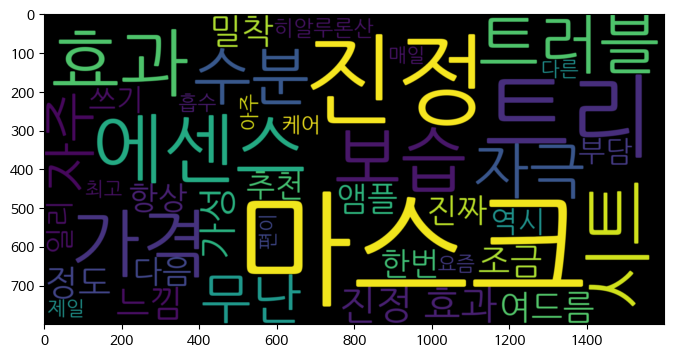

In [ ]:
# Í∏çÏ†ï Î¶¨Î∑∞Ïùò ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
temp_data = ' '.join(np.concatenate(final_pos_df.tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 40 , width = 1600 , height = 800, font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(temp_data)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation = 'bilinear')
wc.to_file("BernoulliNB_Í∏çÏ†ï ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú.png")

In [ ]:
!pip install wordcloud

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 511.1/511.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
The following NEW packages will be installed:
  fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 35.7 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 35.7 MB in 1s (38.0 MB/s)
Selecting previ